In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Load Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Step 2: Normalize Data (Scale pixel values to [0,1])
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten images (28x28 → 784 pixels per image)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Step 3: One-Hot Encoding for Labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Split into Training (90%) & Validation (10%)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Step 6: Set Hyperparameters
hidden_layers = [128, 64, 32]      # Neurons per hidden layer
activation_function = 'relu'       # Activation function (ReLU or Sigmoid)
optimizer_choice = tf.keras.optimizers.Adam(learning_rate=1e-3)  # Optimizer (Adam, SGD, etc.)
weight_decay_value = 0.0001        # L2 Regularization
batch_size = 64                    # Mini-batch size
epochs = 20                        # Number of training epochs

In [ ]:
# Step 5: Build Flexible Neural Network
def build_model(hidden_layers=[128, 64], activation='relu', optimizer='adam', weight_decay=0):
    model = Sequential()

    # First Hidden Layer
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],),
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))

    # Additional Hidden Layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation,
                        kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
        model.add(Dropout(0.5))

    # Output Layer (10 Classes)
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Step 7: Train the Model
model = build_model(hidden_layers=hidden_layers, activation=activation_function, optimizer=optimizer_choice, weight_decay=weight_decay_value)
history = model.fit(
    X_train_split, y_train_split,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4165 - loss: 1.6186 - val_accuracy: 0.7243 - val_loss: 0.6709
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6814 - loss: 0.8668 - val_accuracy: 0.7695 - val_loss: 0.6125
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7207 - loss: 0.7752 - val_accuracy: 0.7887 - val_loss: 0.5848
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7435 - loss: 0.7430 - val_accuracy: 0.8105 - val_loss: 0.5583
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7592 - loss: 0.7148 - val_accuracy: 0.8208 - val_loss: 0.5376
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7767 - loss: 0.6859 - val_accuracy: 0.8328 - val_loss: 0.5146
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7812 - loss: 0.6722 - val_accuracy: 0.8353 - val_loss: 0.5194
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7801 - loss: 0.6721 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8482 - loss: 0.4981
Test Accuracy: 0.8452


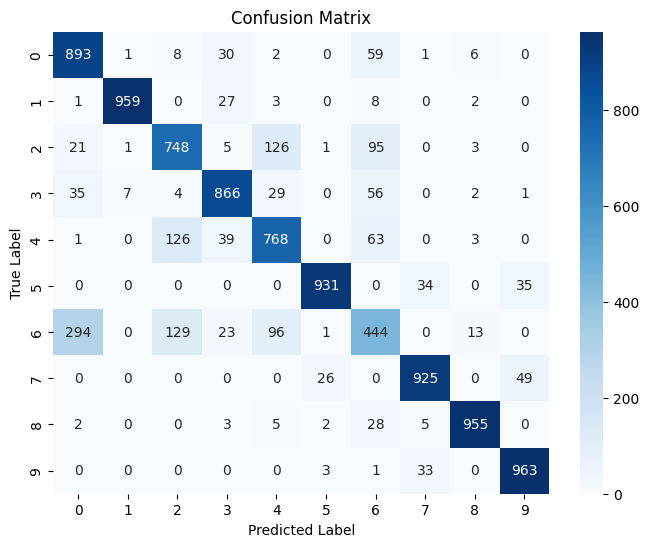

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_acc:.4f}')

# Convert one-hot encoded labels to integer class labels if necessary
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


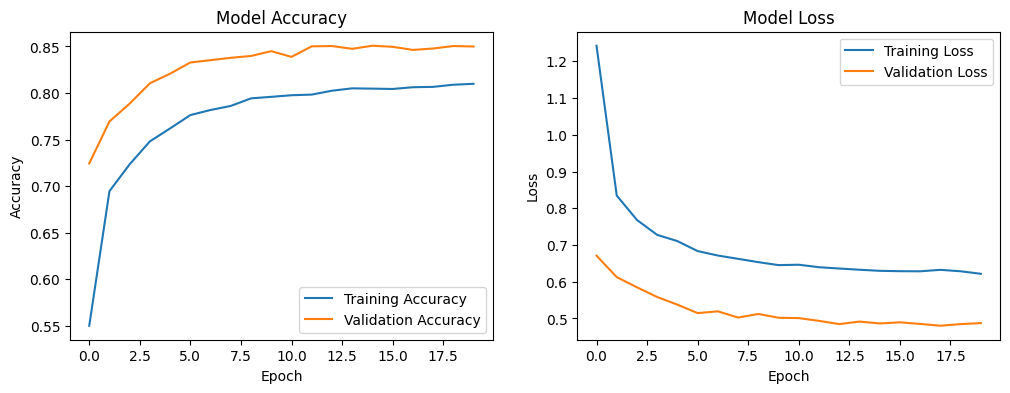

In [ ]:
# Step 9: Plot Training Performance
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()

In [ ]:
## Problem
## Hyperparams: lr, epochs, batch size
## Model architecture: activations: relu

## Scores:
    ## Best score, hyperparams (lr, batch size, epochs)
    ## Which configs didnt work: when the lr was too high or the batch size was too low
    ## Conf matrix
    ## Based on your learnings, what are the three recs:
        # 1. When you train your model for longer, then performance will eventually increase
        # 2. Based on the dataset size, the batch size should be chosen carefully as a larger batcg size will lead to poor perofmance
        # 3. Number of epochs has to be chosen based on model size
        # 4. using regula is always a plus point for improving model robustness